In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = np.random.multivariate_normal([3,4],[[1,0.7],[0.7,1]], size=200)
x = data[:,0]
y = data[:,1]

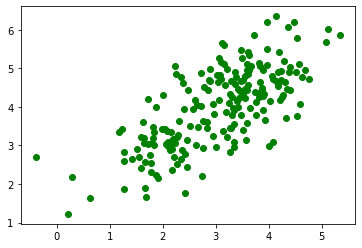

In [4]:
plt.scatter(x,y,color='g')
plt.show()

In [5]:
import torch

In [6]:
x,y = torch.tensor(x), torch.tensor(y)

In [7]:
m = torch.nn.Parameter(data=torch.randn(1))
c = torch.nn.Parameter(data=torch.randn(1))

In [8]:
y_pred = m*x + c

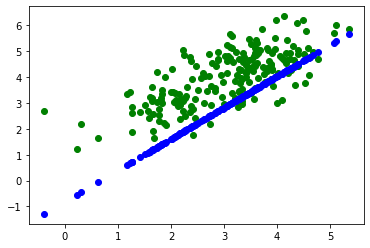

In [9]:
plt.scatter(x.numpy(),y.numpy(),color='g')
plt.scatter(x.numpy(),y_pred.detach().numpy(),color='b')
plt.show()

In [10]:
def mse(y_pred, y_true):
  return ((y_pred - y_true)**2).mean()

In [11]:
print(mse(y_pred, y))

tensor(2.0069, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [12]:
for i in range(100):
  y_pre = m*x + c
  lr = 1e-3

  loss = mse(y_pre, y)

  loss.backward()
  print(loss)
  with torch.no_grad():
    m -= lr*m.grad
    c -= lr*c.grad
    m.grad.zero_()
    c.grad.zero_()

tensor(2.0069, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.9681, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.9311, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.8957, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.8619, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.8296, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.7987, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.7691, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.7408, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.7138, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.6880, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.6633, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.6397, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.6172, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.5956, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.5750, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.5552, dtype=tor

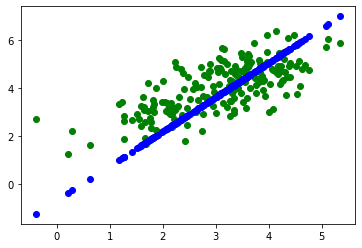

In [13]:
plt.scatter(x.numpy(),y.numpy(),color='g')
plt.scatter(x.numpy(),y_pre.detach().numpy(),color='b')
plt.show()